# Project: Doing an analysis on data set - [googleplaystore]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This dataset contains information on apps from the Google Play Store, including ratings, reviews, and app categories. 





<a id='wrangling'></a>
# Data Wrangling

>I will access the data and clean it by :
delete the duplicated rows and handel the missing values , 
then delete the unneccessary columns, So
I will start exploration process.

In [122]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
df = pd.read_csv("W:/Amit/googleplaystore.csv")
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


Import the data and take aview of first 10 column 

In [59]:
df.columns = df.columns.str.replace(" ","_") 
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

Replace the space in column name by "_"

In [60]:
df.shape

(10841, 13)

The data consists of 10841 rows and 13 columns

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_Ver     10833 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


it showes the type of data in each column 

In [62]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

Number of null values in each column 

In [138]:
df["Rating"].fillna(df["Rating"].median(), inplace=True)
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')  
df['Reviews'] = df['Reviews'].fillna(0).astype(int) 


In [64]:
df.dropna(inplace=True)


In [65]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

### Exploratory Data Analysis

> Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 

In [79]:
def convert_size(size):
    try:
        size = size.upper()  
        if 'M' in size:
            return int(float(size.replace('M', '')) * 1024)
        elif 'K' in size:
            return int(float(size.replace('K', '')))
        else:
            return int(float(size))
    except (ValueError, TypeError):
        return 0  

df['Size_KB'] = df['Size'].apply(convert_size)
mean_value = df['Size_KB'][df['Size_KB'] != 0].mean()
df['Size_KB'] = df['Size_KB'].replace(0, mean_value)
df['Size_KB'] = df['Size_KB'].replace("Varies with device", mean_value)


Handling size column

In [90]:
df.Size_KB.describe().round()

count     10829.0
mean      22051.0
std       21250.0
min           8.0
25%        6041.0
50%       18432.0
75%       26624.0
max      102400.0
Name: Size_KB, dtype: float64

In [89]:
df.drop(columns=['Size'], inplace=True)

In [91]:
df.Installs = df.Installs.apply(lambda x:x.replace("+",""))
df.Installs = df.Installs.apply(lambda x:x.replace(",",""))
df.Installs = df.Installs.apply(lambda x:int(x))

Handling Installs column

In [92]:
df.Price = df.Price.apply(lambda x:x.replace("$",""))
df.Price = df.Price.apply(lambda x:float(x))

Handling Price column

In [94]:
df["Last_Updated"] = pd.to_datetime(df["Last_Updated"])

Handling Last_Updated column

In [95]:
df["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [96]:
df["Genres"] = df["Genres"].str.split(";").str[0] 
df["Genres"].value_counts()
df["Genres"].replace("Music & Audio", "Music", inplace =True)


Handling Genres column

In [97]:
df.head(10)

,App,Category,Rating,Reviews,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Size_KB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19456
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up,14336
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8908
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25600
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4 and up,2867
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up,5734
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,50000,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up,19456
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2 and up,29696
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,33792
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,10000,Free,0.0,Everyone,Art & Design,2018-07-03,2.8,4.0.3 and up,3174


In [98]:
df.dtypes


App                       object
Category                  object
Rating                   float64
Reviews                   object
Installs                   int64
Type                      object
Price                    float64
Content_Rating            object
Genres                    object
Last_Updated      datetime64[ns]
Current_Ver               object
Android_Ver               object
Size_KB                    int32
dtype: object

# Data Visualization


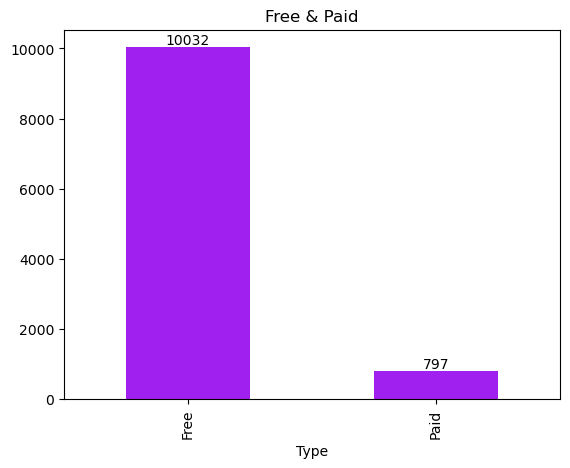

In [106]:
chart1 = df["Type"].value_counts().plot(kind="bar", color="#A020F0")
plt.title("Free & Paid")
for p in chart1.patches:
    chart1.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.show()

### The number of Free app is larger than paied app

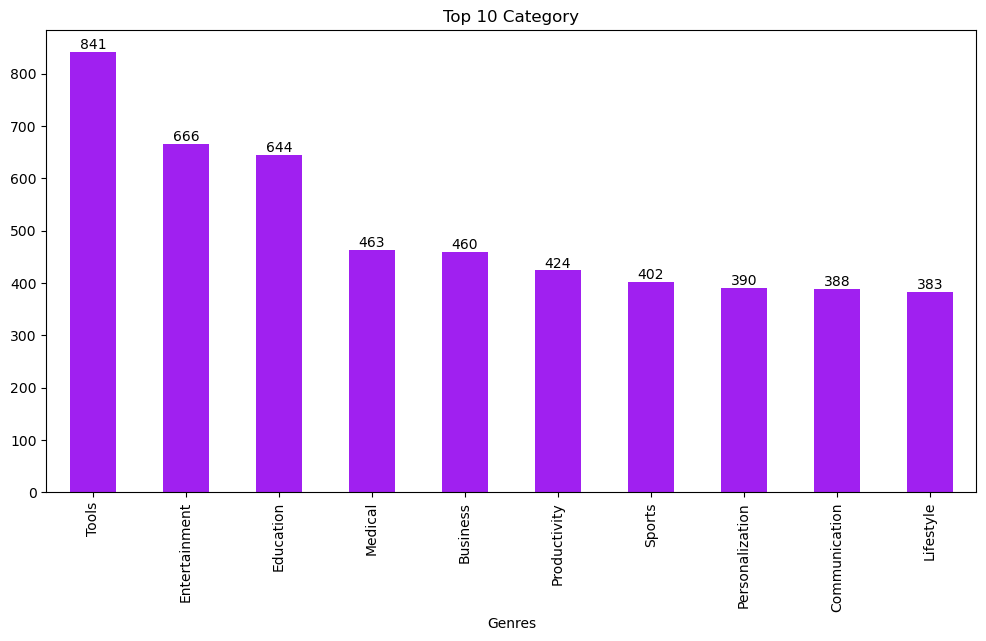

In [114]:
top_genres = df["Genres"].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))  # Adjust size as needed
chart2 = top_genres.plot(kind="bar", color="#A020F0")
plt.title("Top 10 Genres")
for p in chart2.patches:
    chart2.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')
plt.show()


### The Top common Genre is Tools

Text(0.5, 1.0, 'Content rating with their counts')

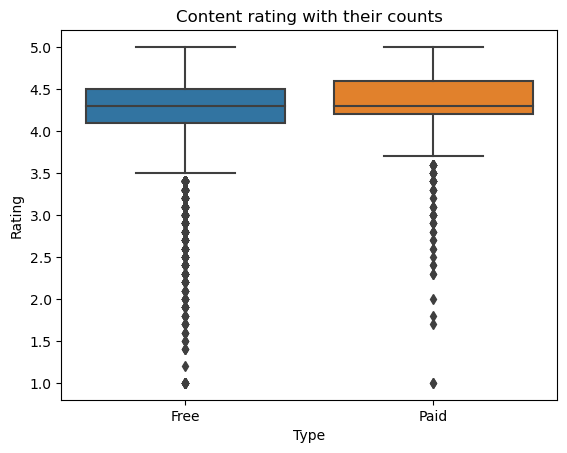

In [123]:
sns.boxplot(x = "Type", y = "Rating", data = df)
plt.title("Content rating with their counts")

### The average rating of paid apps is higher.





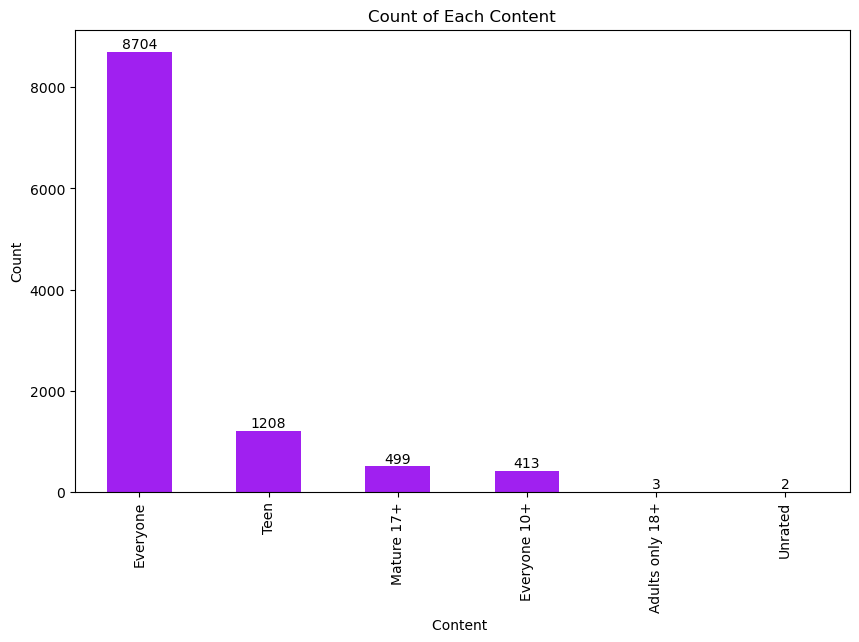

In [126]:
content_rating_counts = df['Content_Rating'].value_counts()
plt.figure(figsize=(10, 6))
chart4 = content_rating_counts.plot(kind='bar', color="#A020F0")
plt.title("Count of Each Content")
plt.xlabel("Content ")
plt.ylabel("Count")
for p in chart4.patches:
    chart4.annotate(f'{p.get_height()}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='bottom')

plt.show()

### Many apps can use by every one

Text(0.5, 1.0, 'The number of categories')

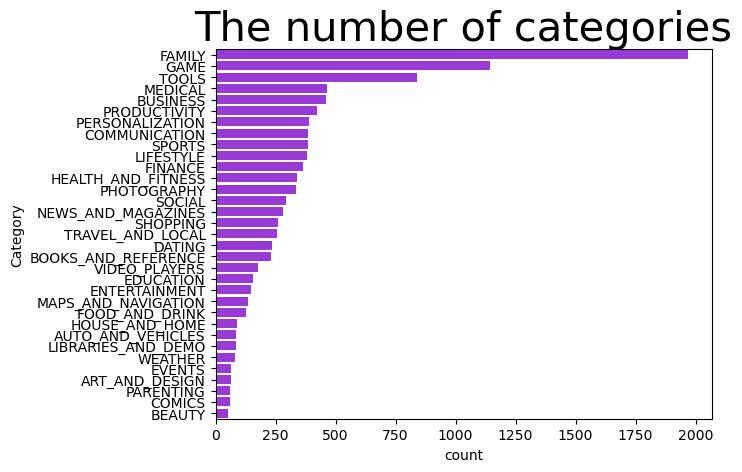

In [132]:
cat_num = df["Category"].value_counts()
sns.barplot(x = cat_num, y = cat_num.index,color="#A020F0", data = df)
plt.title("The number of categories", size=30)

### The family is the most founded Category

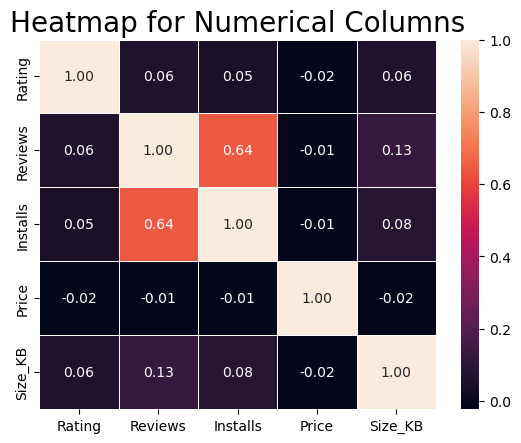

In [139]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, linewidths=.5, fmt=".2f")
plt.title("Heatmap for Numerical Columns", size=20)
plt.show()

### There it a great relation between Installs and Number of Reviews